This exercise is based on Prof. A. Ng lectures on machine learning (Stanford U.)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from functools import partial
from scipy.optimize import fmin_bfgs

# Exercise 5: Logistic regression

We want to classify data, we use the iris data set for that: the features are petal length, width and sepal length, width. There are three types of iris in the dataset (Setosa, Versicolour, and Virginica).

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y= iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

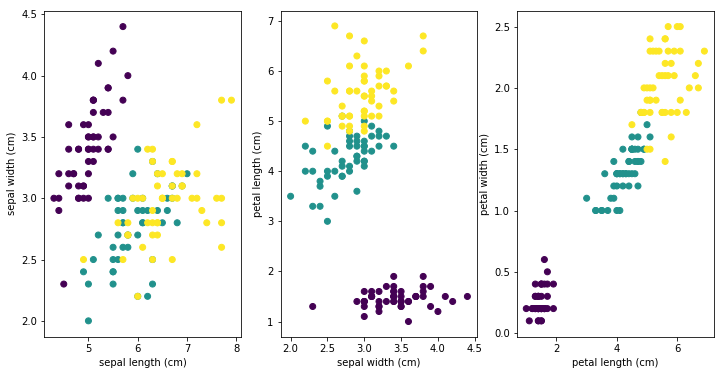

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.scatter(X[:,0],X[:,1],c=y)
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])
ax2.scatter(X[:,1],X[:,2],c=y)
ax2.set_xlabel(iris.feature_names[1])
ax2.set_ylabel(iris.feature_names[2])
ax3.scatter(X[:,2],X[:,3],c=y)
ax3.set_xlabel(iris.feature_names[2])
ax3.set_ylabel(iris.feature_names[3]);

## Model: logistic regression
We use as model the logistic regression, defining an hypothesis:<br>
$
h_\theta(x) = \frac{1}{1+e^{-\theta^T\cdot x}}~,~x,\theta\in\mathbb{R}^n 
$<br>
Given two categories ${0,1}$ where 0 is not correct classification and 1 is correct, we can interpret the hypothesis as: 
$h_\theta(x) = prob(y=1|x;\theta)$<br>

In [6]:
def sigmoid(z):
    '''
    Sigmoid funcion
    '''
    from numpy import exp
    return 1./(1.+exp(-z))

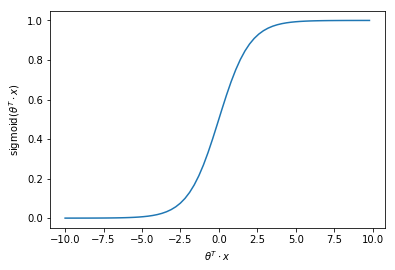

In [7]:
_x = np.arange(-10.,10.,0.3)
plt.plot(_x,sigmoid(_x))
plt.xlabel(r'$\theta^T\cdot x$')
plt.ylabel(r'sigmoid($\theta^T\cdot x$)');

We define the cost function as:<br>
$ \begin{eqnarray}
J(\theta)  & = &  \frac{1}{m}\sum_{i=1}^m Cost(h_\theta(x^{(i)}),y^{(i)}) \\
Cost(h_\theta(x),y) & = & -y\ln(h_\theta(x)) - (1-y)\ln(1-h_\theta(x)) \\
J(\theta) & = & -\frac{1}{m}\big(\sum_{i=1}^m y^{(i)}\ln(h_\theta(x^{(i)}))+(1-y^{(i)})\sum_{i=1}^m\ln(1-h_\theta(x^{(i)}))\big)\\
 & = & -\frac{1}{m} MaxLike(\theta) \\
\end{eqnarray}$<br>
The right-hand side of the cost equation is the maximum likelihood. As for the linear regression we define the design matrix $X$ as: 
$
\begin{bmatrix}
    \dots & x^{(1)T} & \dots \\
    \dots & x^{(2)T} & \dots \\
    \dots & \dots & \dots \\
    \dots & x^{(m)T} & \dots \\
    \end{bmatrix}
=
\begin{bmatrix}
1 & x_1^{(1)} & \dots & x_n^{(1)} \\
1 & x_1^{(2)} & \dots & x_n^{(2)} \\
\dots & \dots & \dots & \dots \\
1 & x_1^{(m)} & \dots & x_n^{(m)} \\
\end{bmatrix}
$<br>
And the parameter and target (column-)vectors as: $y,\theta\in\mathbb{R}^m$, we can rewrite the cost function in matrix notation as:<br>
$ J(\theta) = -\frac{1}{m}(y^T\cdot\ln(h_\theta(X))+(1-y)^T\ln(1-h_\theta(X))) $, with $1\in\mathbb{R}^m$ being a vector with all elements equal to 1 and the $\ln$ operation is applied element wise the to the argument so that $\ln(h_\theta(X)\in\mathbb{R}^m$ when:<br> $h_\theta(x)=\frac{1}{1+e^-(X\cdot\theta)}$.

In [8]:
def hyp(X,theta):
    '''
    Hypothesis in matrix form
    :param: X design matrix m x (n+1)
    :param: theta column-matrix (n+1)x1
    :return: column-matrix m x 1
    '''
    return sigmoid(X*theta)

The gradient descent algorithm, written in matrix form with the cost fucntion defined as above, takes the same form as the one for linear regression:<br>
$\theta := \theta - \frac{\alpha}{m}X^T\cdot(h_\theta(X)-y)$

For our case, $y$ it must be ${0,1}$, let's say we want to classify the first class of the dataset:

In [9]:
iris.target_names[0]

'setosa'

In [10]:
y = np.matrix((y==0)).T.astype(float)
print(y.A1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [11]:
#Building the design matrix
X = np.append([[1]]*len(X),X,axis=1)
X[-10:,:]

array([[1. , 6.7, 3.1, 5.6, 2.4],
       [1. , 6.9, 3.1, 5.1, 2.3],
       [1. , 5.8, 2.7, 5.1, 1.9],
       [1. , 6.8, 3.2, 5.9, 2.3],
       [1. , 6.7, 3.3, 5.7, 2.5],
       [1. , 6.7, 3. , 5.2, 2.3],
       [1. , 6.3, 2.5, 5. , 1.9],
       [1. , 6.5, 3. , 5.2, 2. ],
       [1. , 6.2, 3.4, 5.4, 2.3],
       [1. , 5.9, 3. , 5.1, 1.8]])

In [12]:
def cost(X, y, theta):
    '''
    Cost function for logistic regression
    :param: X design matrix $\in\mathbb{R}^{m\times(n+1)}$
    :param: y target (column-)vector $\in\mathbb{R}^m$
    :param: theta parameter (column-)vector $\in\mathbb{R}^{n+1}$
    :return: value of cost function
    '''
    from numpy import log
    _h = hyp(X,theta)
    _m = X.shape[0]
    #_one= matrix(ones_like(y)).T
    return -1./_m*(y.T*log(_h)+(1-y).T*log(1-_h))#[0,0]

def grad_cost(X, y, theta):
    '''
    Gradient of logistic regression
    :param: X design matrix $\in\mathbb{R}^{m\times(n+1)}$
    :param: y target (column-)vector $\in\mathbb{R}^m$
    :param: theta parameter (column-)vector $\in\mathbb{R}^{n+1}$
    :retrun: column-vector $\in\mathbb{R}^{n+1}$ of gradient
    '''
    return X.T*(hyp(X,theta)-y)/y.shape[0]
theta0 = np.matrix(np.zeros(X.shape[1])).T
print('For example on default parameters {0:s} the cost function is evals {1:f}'.format(str(theta0.A1), cost(X,y,theta0)[0,0]))
#print(grad_cost(X,y,theta0))

For example on default parameters [0. 0. 0. 0. 0.] the cost function is evals 0.693147


In [13]:
def descend(X, y, theta0, alpha = 0.01, steps = 1500, cost_fun=cost, gradient=grad_cost):
    '''
    Implement gradient descent for logistic regression
    '''
    Js = []
    theta = theta0
    for _ in range(0,steps):
        Js.append(cost_fun(X,y,theta))
        theta = theta - alpha*gradient(X,y,theta)
    return (theta,Js)

In [14]:
solution, costs = descend(X,y,theta0,steps=100000,alpha=0.0003)
print(solution)

[[ 0.25067511]
 [ 0.39232852]
 [ 1.33277834]
 [-2.09834267]
 [-0.94753695]]


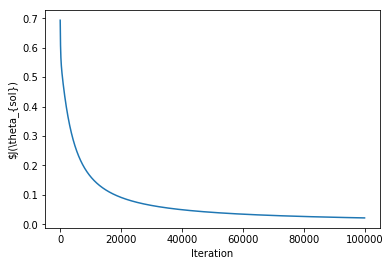

In [15]:
plt.plot(list(map(lambda x: x[0,0],costs)))
plt.xlabel('Iteration')
plt.ylabel(r'$J(\theta_{sol})');

Let's now calculate $prob('setosa'|x;\theta_{sol})$, and histogram the values, the prediction clearly works pretty well.

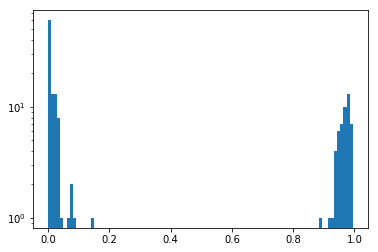

In [16]:
pred = hyp(X,solution)
plt.hist(pred,bins=100,log=True);

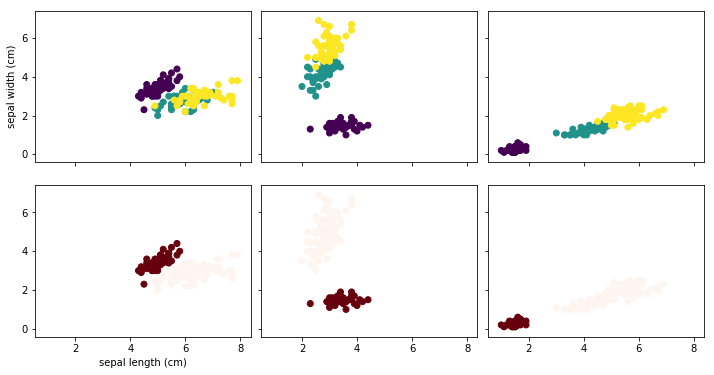

In [17]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(12,6),sharey=True, sharex=True)
ax1.scatter(X[:,1],X[:,2],c=iris.target)
ax1.set_ylabel(iris.feature_names[1])
ax2.scatter(X[:,2],X[:,3],c=iris.target)
ax3.scatter(X[:,3],X[:,4],c=iris.target)
#My calculations
ax4.scatter(X[:,1],X[:,2],c=y.A1,cmap='Reds')
ax4.set_xlabel(iris.feature_names[0])
ax5.scatter(X[:,2],X[:,3],c=y.A1,cmap='Reds')
ax6.scatter(X[:,3],X[:,4],c=y.A1,cmap='Reds')
fig.subplots_adjust(hspace=0.15,wspace=0.05)

## One-vs-all
To classify multiple categories, we use the same approach and do three fits to classify each category against the others, calcualte $\max_{c\in{0,1,2}}prob_{c}(y=c~|~X;\theta)$ as the category for each example. 

Now executing gradient descent for versicolor
[[ 0.22348624]
 [ 0.23476686]
 [-1.03270104]
 [ 0.38369334]
 [-0.59290986]]
Now executing gradient descent for virginica
[[-0.59284555]
 [-1.22710421]
 [-1.14470984]
 [ 1.86022766]
 [ 1.51604982]]


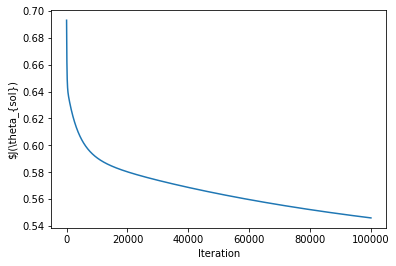

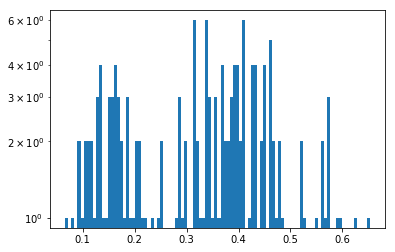

<Figure size 432x288 with 0 Axes>

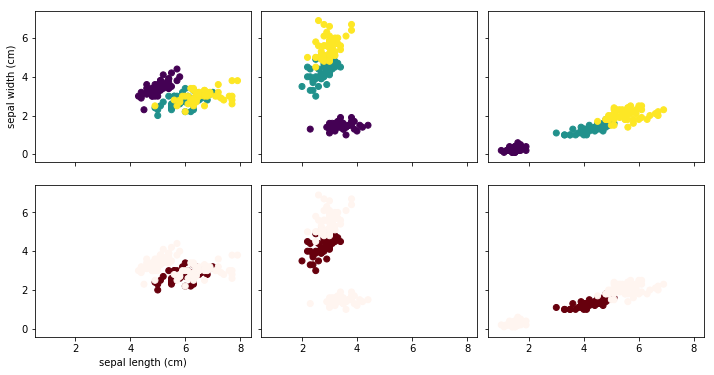

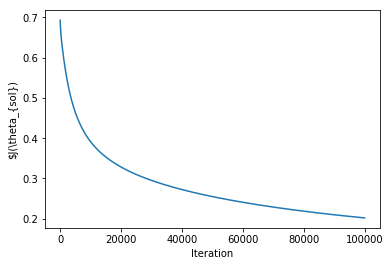

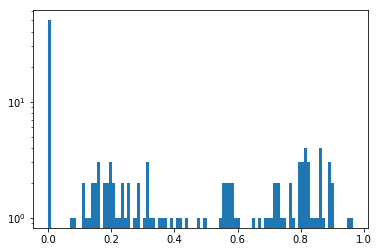

<Figure size 432x288 with 0 Axes>

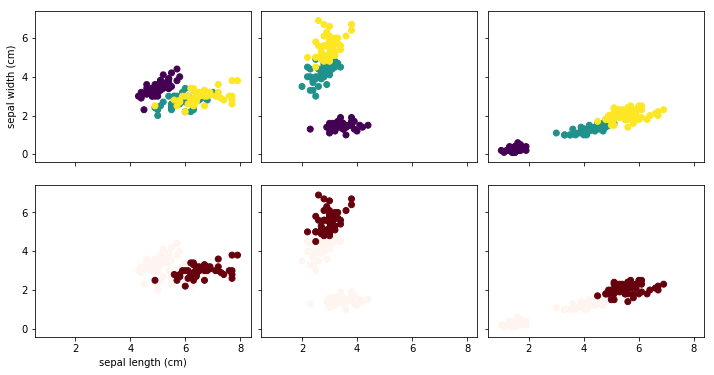

In [18]:
sols=[solution.A1]
for i in [1,2]:
    print('Now executing gradient descent for',iris.target_names[i])
    y=(iris.target==i)
    y=np.matrix(y).astype(float).T
    solution, costs = descend(X,y,theta0,alpha=0.0003,steps=100000)
    print(solution)
    sols.append(solution.A1)
    plt.figure()
    plt.plot(list(map(lambda x: x[0,0],costs)))
    plt.xlabel('Iteration')
    plt.ylabel(r'$J(\theta_{sol})')
    plt.figure()
    pred = hyp(X,solution)
    plt.hist(pred,bins=100,log=True)
    plt.figure()
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(12,6),sharey=True, sharex=True)
    ax1.scatter(X[:,1],X[:,2],c=iris.target)
    ax1.set_ylabel(iris.feature_names[1])
    ax2.scatter(X[:,2],X[:,3],c=iris.target)
    ax3.scatter(X[:,3],X[:,4],c=iris.target)
    #My calculations
    ax4.scatter(X[:,1],X[:,2],c=y.A1,cmap='Reds')
    ax4.set_xlabel(iris.feature_names[0])
    ax5.scatter(X[:,2],X[:,3],c=y.A1,cmap='Reds')
    ax6.scatter(X[:,3],X[:,4],c=y.A1,cmap='Reds')
    fig.subplots_adjust(hspace=0.15,wspace=0.05)

In [19]:
solutions=np.matrix(sols).T
print(solutions)

[[ 0.25067511  0.22348624 -0.59284555]
 [ 0.39232852  0.23476686 -1.22710421]
 [ 1.33277834 -1.03270104 -1.14470984]
 [-2.09834267  0.38369334  1.86022766]
 [-0.94753695 -0.59290986  1.51604982]]


## Using sklearn
Finally let's use `sklearn.linear_model` to fit the data with the default `LogisticRegression` model. That by default can perform One-vs-All. It is very simple to show on the train data itself that this is very fast and precise.

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',multi_class='ovr')
result=model.fit(X,iris.target)

In [24]:
result.score(X,iris.target)

0.9533333333333334

In [25]:
result.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])